In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
# 지표를 하나만 설정할 경우
from sklearn.model_selection import cross_val_score
# 지표를 하나 이상 설정할 경우
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 모델의 최적의 하이퍼파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

# 시간 측정을 위한 시간 모듈
import datetime

# 회귀

### 학습을 위한 데이터 처리

In [2]:
df1 = pd.read_csv('data/boston.csv')

X = df1.drop('target', axis=1)
y = df1['target']

# 표준화
scaler1 = StandardScaler()
scaler1.fit(X)
X = scaler1.transform(X)

display(X)
display(y)


array([[-0.63326028,  0.12485095, -1.03628034, ..., -1.07088823,
         0.41031054, -0.92655695],
       [-0.60097475, -0.58885279, -0.25831126, ...,  0.06047401,
         0.41031054, -0.22972861],
       [-0.60100552, -0.58885279, -0.25831126, ...,  0.06047401,
         0.31149419, -1.08568842],
       ...,
       [-0.56479774, -0.58885279, -0.56557636, ...,  1.14658176,
         0.23574309, -0.80930218],
       [-0.5854857 , -0.58885279, -0.56557636, ...,  1.14658176,
         0.22821654, -0.63006989],
       [-0.58205565, -0.58885279, -0.56557636, ...,  1.14658176,
         0.41031054, -0.41901131]])

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
331    17.1
332    19.4
333    22.2
334    20.7
335    21.1
Name: target, Length: 336, dtype: float64

### 기본 모델 사용하기

In [3]:
model1 = AdaBoostRegressor()

# 교차 검증 수행
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

r1 = cross_val_score(model1, X, y, scoring='r2', cv=kfold)

print(f"평균 성능 수치 :{r1.mean()}")

평균 성능 수치 :0.8681936894587421


In [4]:
model1 = GradientBoostingRegressor()

# 교차 검증 수행
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

r1 = cross_val_score(model1, X, y, scoring='r2', cv=kfold)

print(f"평균 성능 수치 :{r1.mean()}")

평균 성능 수치 :0.9132796609726175


In [5]:
model1 = LGBMRegressor()

# 교차 검증 수행
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

r1 = cross_val_score(model1, X, y, scoring='r2', cv=kfold)

print(f"평균 성능 수치 :{r1.mean()}")

평균 성능 수치 :0.9101045727020003


In [6]:
model1 = XGBRegressor()

# 교차 검증 수행
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

r1 = cross_val_score(model1, X, y, scoring='r2', cv=kfold)

print(f"평균 성능 수치 :{r1.mean()}")

평균 성능 수치 :0.890739990337275


### 모델 하이퍼 파라미터 튜닝

In [7]:
# learning_rate : 학습률
# n_estimators : 트리의 개수
# max_depth : 최대 질문 생성 깊이
params = {
    'n_estimators' : [50, 100, 150],
#     'max_depth' : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

model1 = AdaBoostRegressor()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf1 = GridSearchCV(model1, param_grid=params, scoring='r2', cv=kfold)
start = datetime.datetime.now()
grid_clf1.fit(X, y)
end = datetime.datetime.now()
print(f'최적의 하이퍼 파라미터 : {grid_clf1.best_params_}')
print(f'최적의 모델 평균성능 : {grid_clf1.best_score_}')
print(f"실행시간{end - start}")

최적의 하이퍼 파라미터 : {'n_estimators': 50}
최적의 모델 평균성능 : 0.8741209022369857
실행시간0:00:09.464196


In [8]:
# learning_rate : 학습률
# n_estimators : 트리의 개수
# max_depth : 최대 질문 생성 깊이
params = {
    "learning_rate" : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
    'n_estimators' : [50, 100, 150],
#     'max_depth' : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

model2 = GradientBoostingRegressor()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf2 = GridSearchCV(model2, param_grid=params, scoring='r2', cv=kfold)
start = datetime.datetime.now()
grid_clf2.fit(X, y)
end = datetime.datetime.now()
print(f'최적의 하이퍼 파라미터 : {grid_clf2.best_params_}')
print(f'최적의 모델 평균성능 : {grid_clf2.best_score_}')
print(f"실행시간{end - start}")

최적의 하이퍼 파라미터 : {'learning_rate': 0.1, 'n_estimators': 150}
최적의 모델 평균성능 : 0.9137434488033348
실행시간0:00:29.244100


In [9]:
# learning_rate : 학습률
# n_estimators : 트리의 개수
# max_depth : 최대 질문 생성 깊이
params = {
    "learning_rate" : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
    'n_estimators' : [50, 100, 150],
#     'max_depth' : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

model3 = LGBMRegressor()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf3 = GridSearchCV(model3, param_grid=params, scoring='r2', cv=kfold)
start = datetime.datetime.now()
grid_clf3.fit(X, y)
end = datetime.datetime.now()
print(f'최적의 하이퍼 파라미터 : {grid_clf3.best_params_}')
print(f'최적의 모델 평균성능 : {grid_clf3.best_score_}')
print(f"실행시간{end - start}")

최적의 하이퍼 파라미터 : {'learning_rate': 0.1, 'n_estimators': 100}
최적의 모델 평균성능 : 0.9101045727020003
실행시간0:00:13.360498


In [12]:
# booster : 사용할 알고리즘 종류
# learning_rate : 학습률
# n_estimators : 트리의 개수
# max_depth : 최대 질문 생성 깊이
params = {
    'booster' : ["gbtree", "gblinear"],
    "learning_rate" : [0.0001, 0.001, 0.01, 0.1, 1],
    'n_estimators' : [50, 100, 150, 200, 250, 300],
#     'max_depth' : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

model4 = XGBRegressor(silent=True, verbosity=0)
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf4 = GridSearchCV(model4, param_grid=params, scoring='r2', cv=kfold)
start = datetime.datetime.now()
grid_clf4.fit(X, y)
end = datetime.datetime.now()
print(f'최적의 하이퍼 파라미터 : {grid_clf4.best_params_}')
print(f'최적의 모델 평균성능 : {grid_clf4.best_score_}')
print(f"실행시간{end - start}")

최적의 하이퍼 파라미터 : {'booster': 'gbtree', 'learning_rate': 0.1, 'n_estimators': 150}
최적의 모델 평균성능 : 0.9032621023019196
실행시간0:01:21.130811


### 최적의 모델에 전체 데이터를 학습시킨다.

In [13]:
# 최적의 학습모델을 추출한다.
best_model1 = grid_clf1.best_estimator_
best_model2 = grid_clf2.best_estimator_
best_model3 = grid_clf3.best_estimator_
best_model4 = grid_clf4.best_estimator_

# 전체 데이터를 학습시킨다.
best_model1.fit(X, y)
best_model2.fit(X, y)
best_model3.fit(X, y)
best_model4.fit(X, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=150, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, silent=True,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=0)

### 학습 데이터로 검증을 해본다.

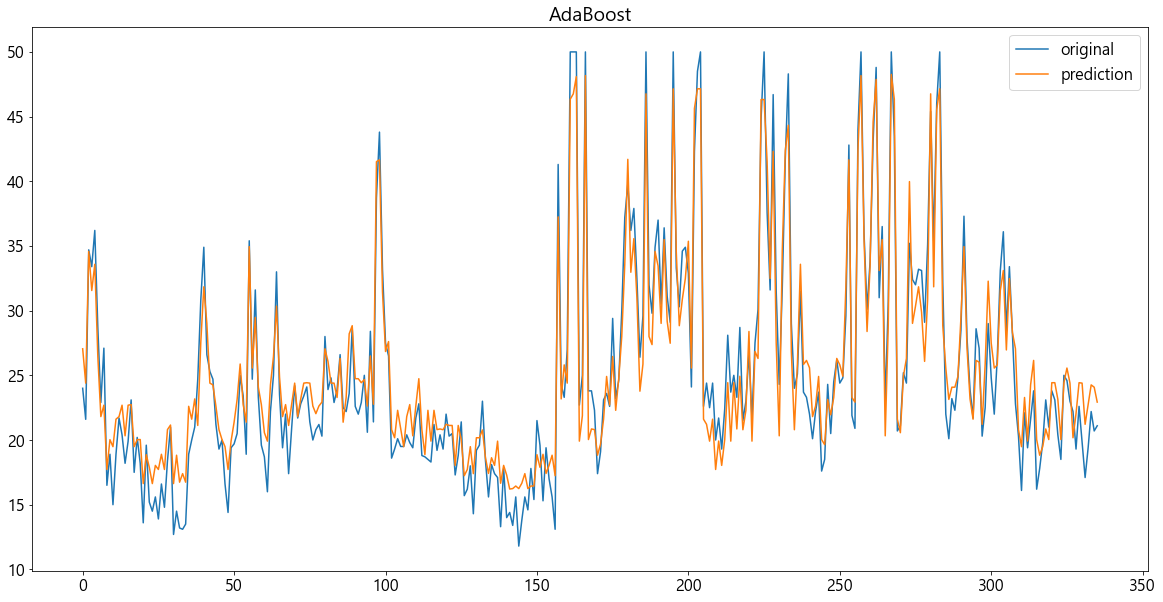

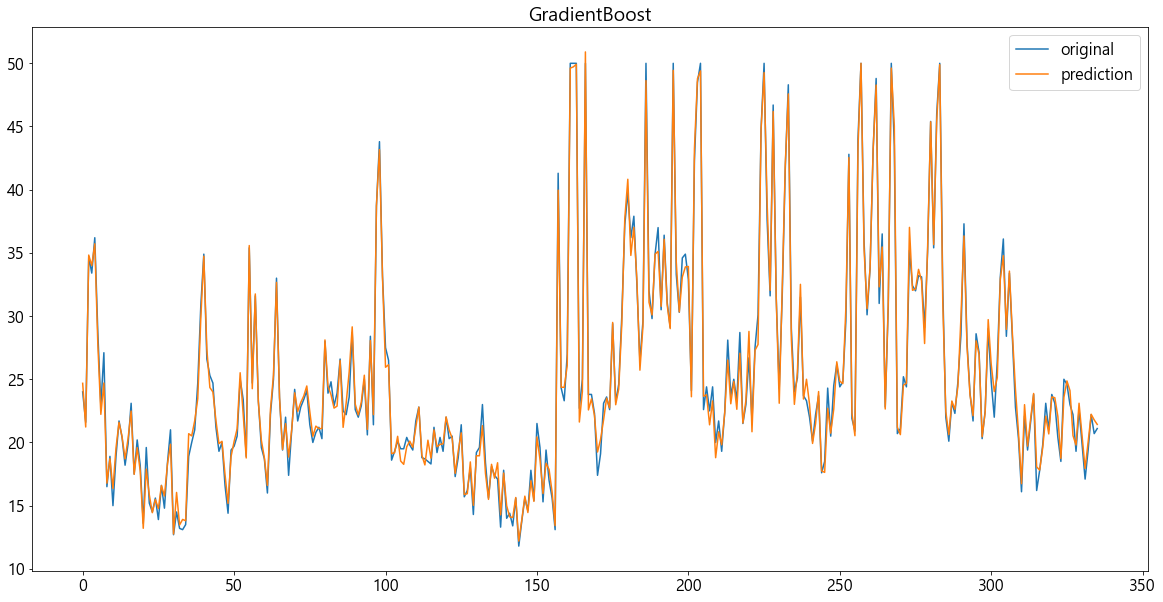

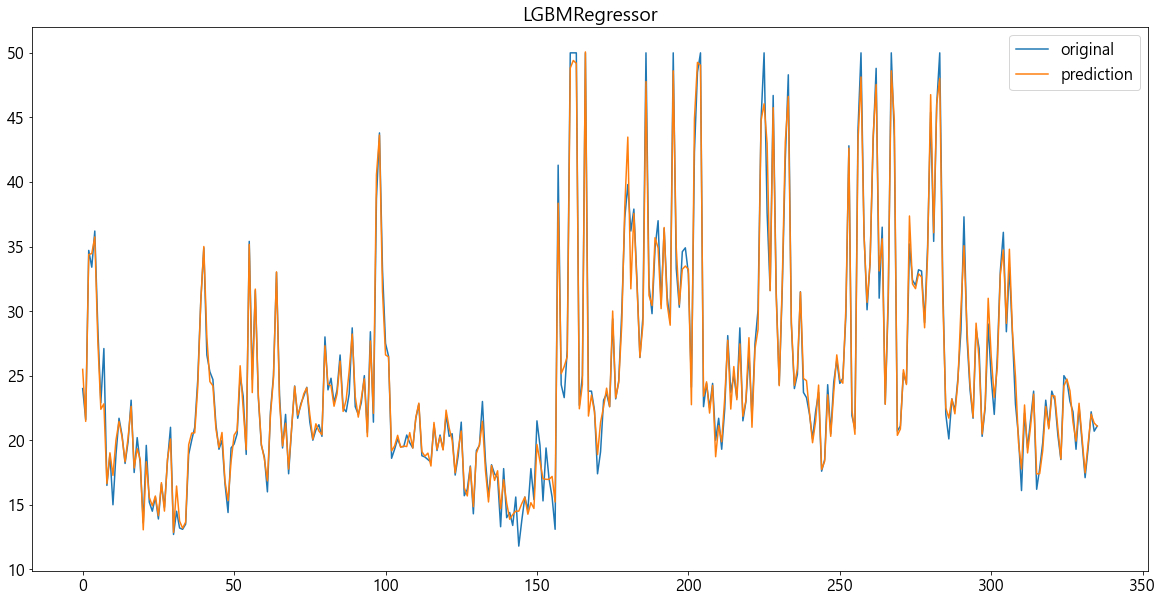

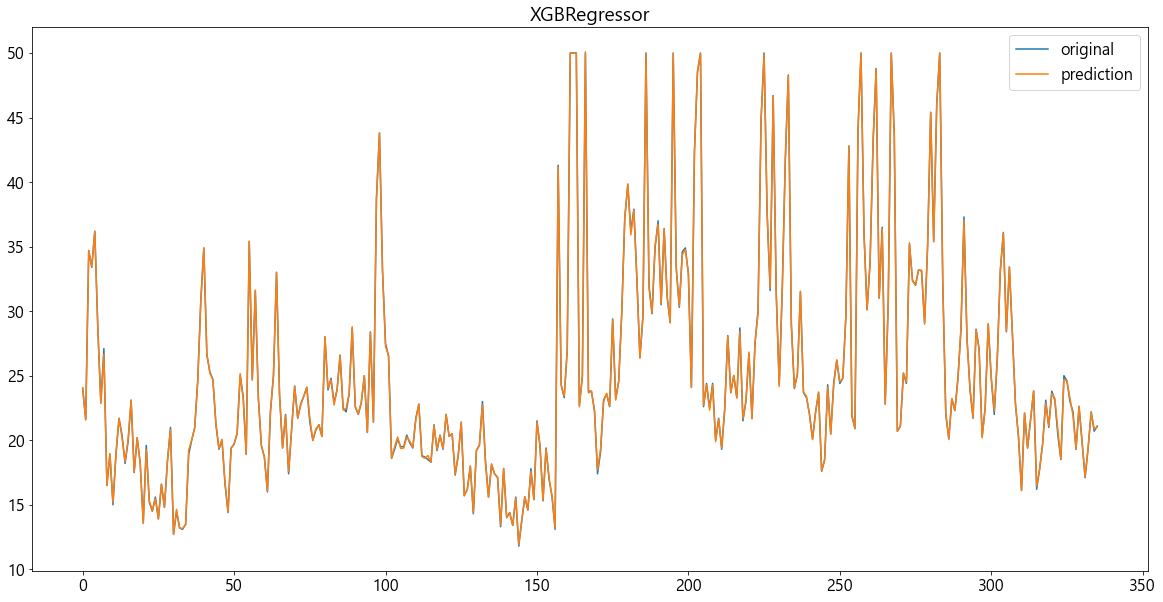

In [16]:
# 학습 데이터를 통해 예측 결과를 가져온다
y_pred1 = best_model1.predict(X)
y_pred2 = best_model2.predict(X)
y_pred3 = best_model3.predict(X)
y_pred4 = best_model4.predict(X)

# 진짜 결과와 예측 결과를 시각화하여 패턴을 확인한다.
plt.plot(y, label='original')
plt.plot(y_pred1, label='prediction')
plt.legend()
plt.title("AdaBoost")
plt.show()

# 진짜 결과와 예측 결과를 시각화하여 패턴을 확인한다.
plt.plot(y, label='original')
plt.plot(y_pred2, label='prediction')
plt.legend()
plt.title("GradientBoost")
plt.show()

# 진짜 결과와 예측 결과를 시각화하여 패턴을 확인한다.
plt.plot(y, label='original')
plt.plot(y_pred3, label='prediction')
plt.legend()
plt.title("LGBMRegressor")
plt.show()

# 진짜 결과와 예측 결과를 시각화하여 패턴을 확인한다.
plt.plot(y, label='original')
plt.plot(y_pred4, label='prediction')
plt.legend()
plt.title("XGBRegressor")
plt.show()

###  예측 결과 추출

In [ ]:
df2 = pd.read_csv('data/boston_new.csv')

scaled_data = scaler1.transform(df2)

y_pred1 = best_model1.